<a href="https://colab.research.google.com/github/snehendu1983/CRADIT-CARD-DEFAULT-PREDICTION_CLASSIFICATION/blob/main/Credit_Card_Default_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [ ]:
# Mounting The Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Uploading the data
file_path = ('/content/drive/MyDrive/AlmaBetter capstone project/default of credit card clients.xls')
df = pd.read_excel(file_path, header=1)

In [ ]:
# Observing the data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Shape of data
df.shape

(30000, 25)

# **Data Cleaning**

In [ ]:
# Complete information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#summary of dataset
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#check for na values in dataset
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
#check for null values in dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
#check for any duplicates
len(df[df.duplicated()])

0

- Dataset dose not contains any NA values, null values and duplicates.

# <b> Data Description </b>



In [ ]:
#columns of dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#shape of dataset
df.shape

(30000, 25)

## **History of past payment.**

### I tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

* **PAY_0**: Payment received in September, 2005

* **PAY_2**: Payment received in August, 2005

* **PAY_3**: Payment received in July, 2005

* **PAY_4**: Payment received in June, 2005

* **PAY_5**: Payment received in May, 2005

* **PAY_6**: Payment received in April, 2005


## **Amount of bill statement (NT dollar).**

* **BILL_AMT1**: Amount of bill statement in September, 2005

* **BILL_AMT2**: Amount of bill statement in August, 2005

* **BILL_AMT3:** Amount of bill statement in July, 2005

* **BILL_AMT4**: Amount of bill statement in June, 2005

* **BILL_AMT5**: Amount of bill statement in May, 2005

* **BILL_AMT6**: Amount of bill statement in April, 2005

## **Amount of previous payment (NT dollar).**

* **PAY_AMT1**: Amount of previous payment in September, 2005

* **PAY_AMT2**: Amount of previous payment in August, 2005

* **PAY_AMT3**: Amount of previous payment in July, 2005

* **PAY_AMT4**: Amount of previous payment in June, 2005

* **PAY_AMT5**: Amount of previous payment in May, 2005

* **PAY_AMT6**: Amount of previous payment in April, 2005

* **default.payment.next.month**: Default payment (1=yes, 0=no)

# **Data Preprocessing**

**Changing name of some columns for simplicity and better understanding**

In [ ]:
#renaming of columns
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [ ]:
#check for columns name
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [ ]:
#check for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


# **Exploratory Data Analysis**

## **IsDefaulter**

<Axes: xlabel='IsDefaulter', ylabel='count'>

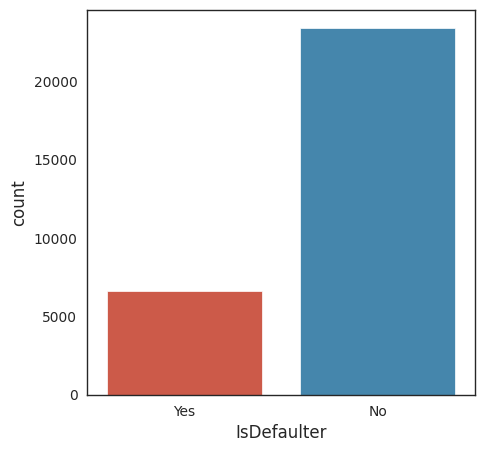

In [ ]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)

- Both classes are not in proportion that is we have imbalanced dataset.

<Axes: xlabel='SEX', ylabel='count'>

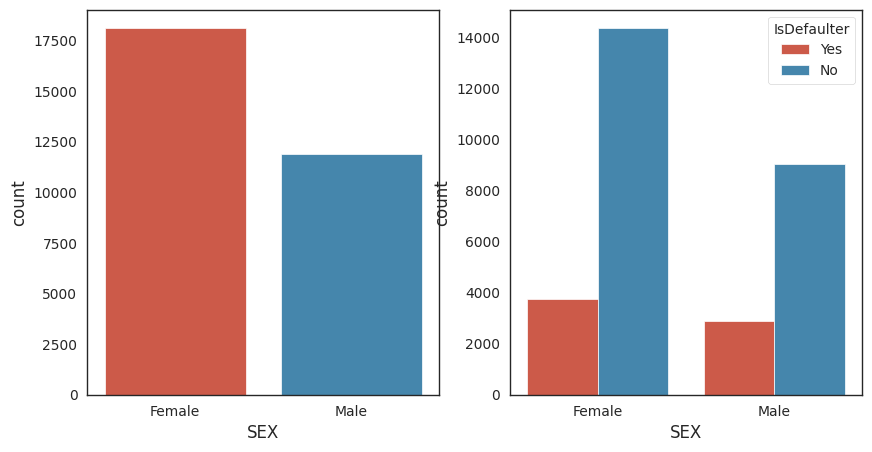

In [ ]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

## **EDUCATION**

In [ ]:
#category wise values
df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

- In education column, values such as 5,6 and 0 are unknown. Lets combine those values as others.

In [ ]:
#replcae values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: "Others", 6: "Others",0: "Others"})

<Axes: xlabel='EDUCATION', ylabel='count'>

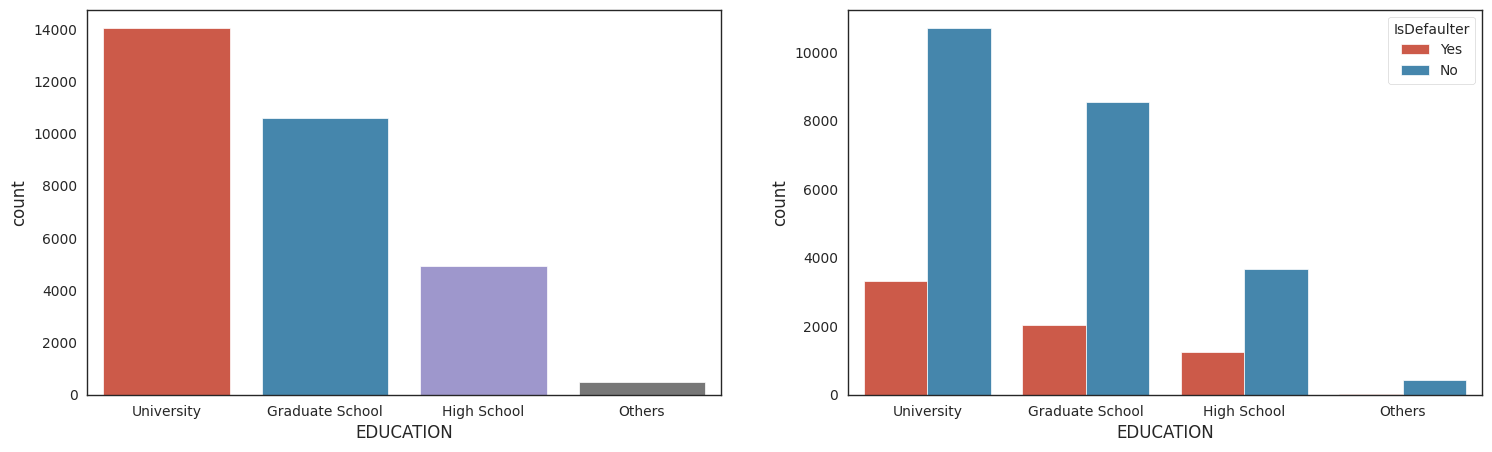

In [ ]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

## **MARRIAGE**

In [ ]:
#category wise values
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64

- In marriage column, 0 values are not known. Combine those values in others category.

In [ ]:
#replace 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: "Others"})

<Axes: xlabel='MARRIAGE', ylabel='count'>

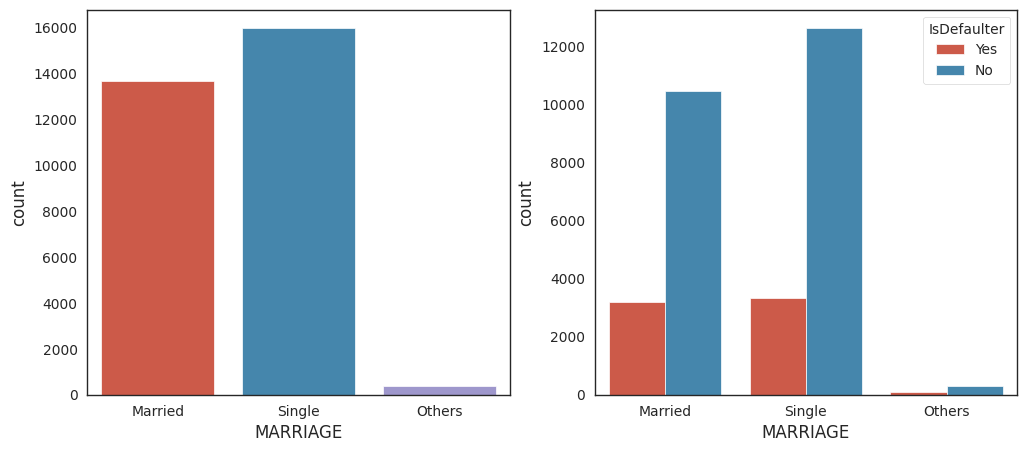

In [ ]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(12,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

## **AGE**

In [ ]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

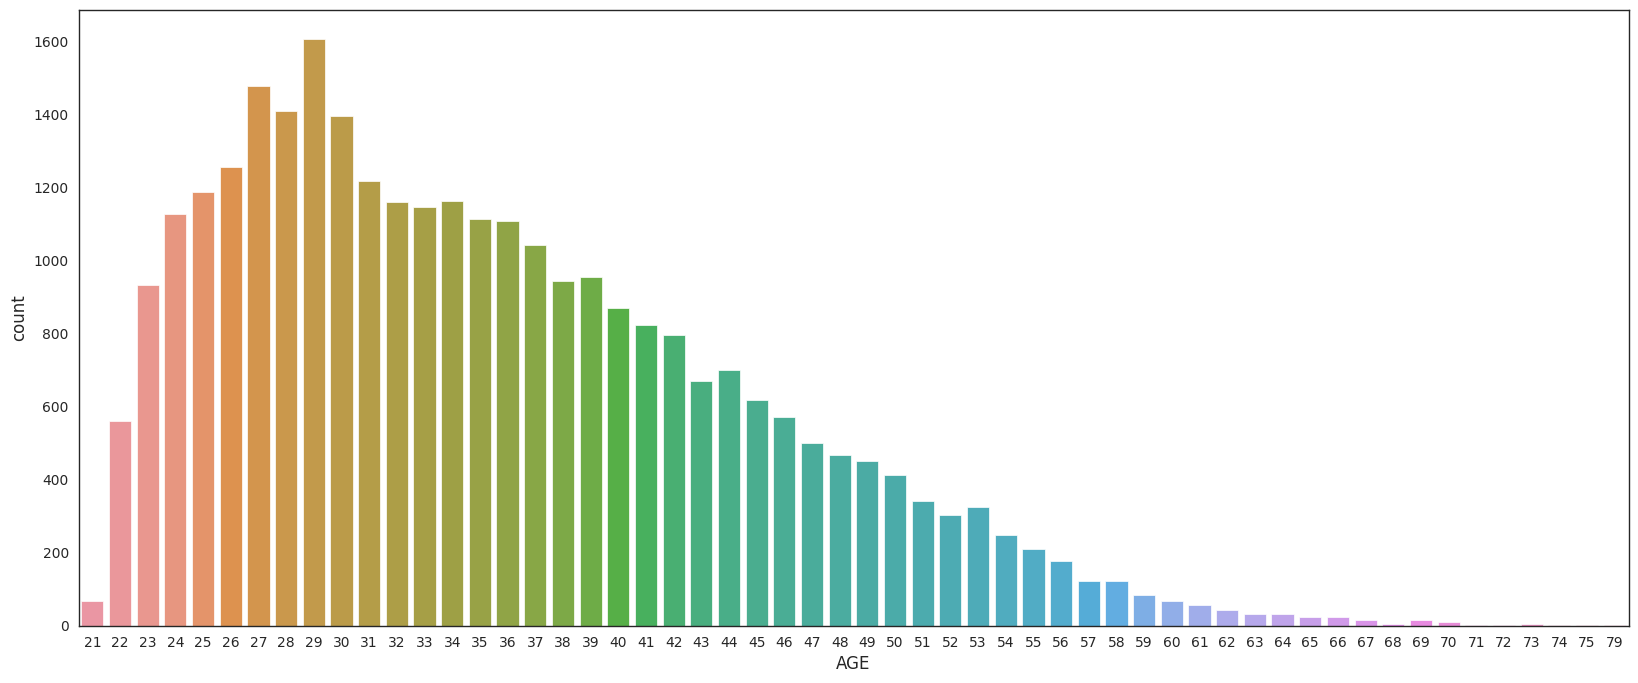

In [ ]:
#values count for AGE
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<Axes: xlabel='AGE', ylabel='count'>

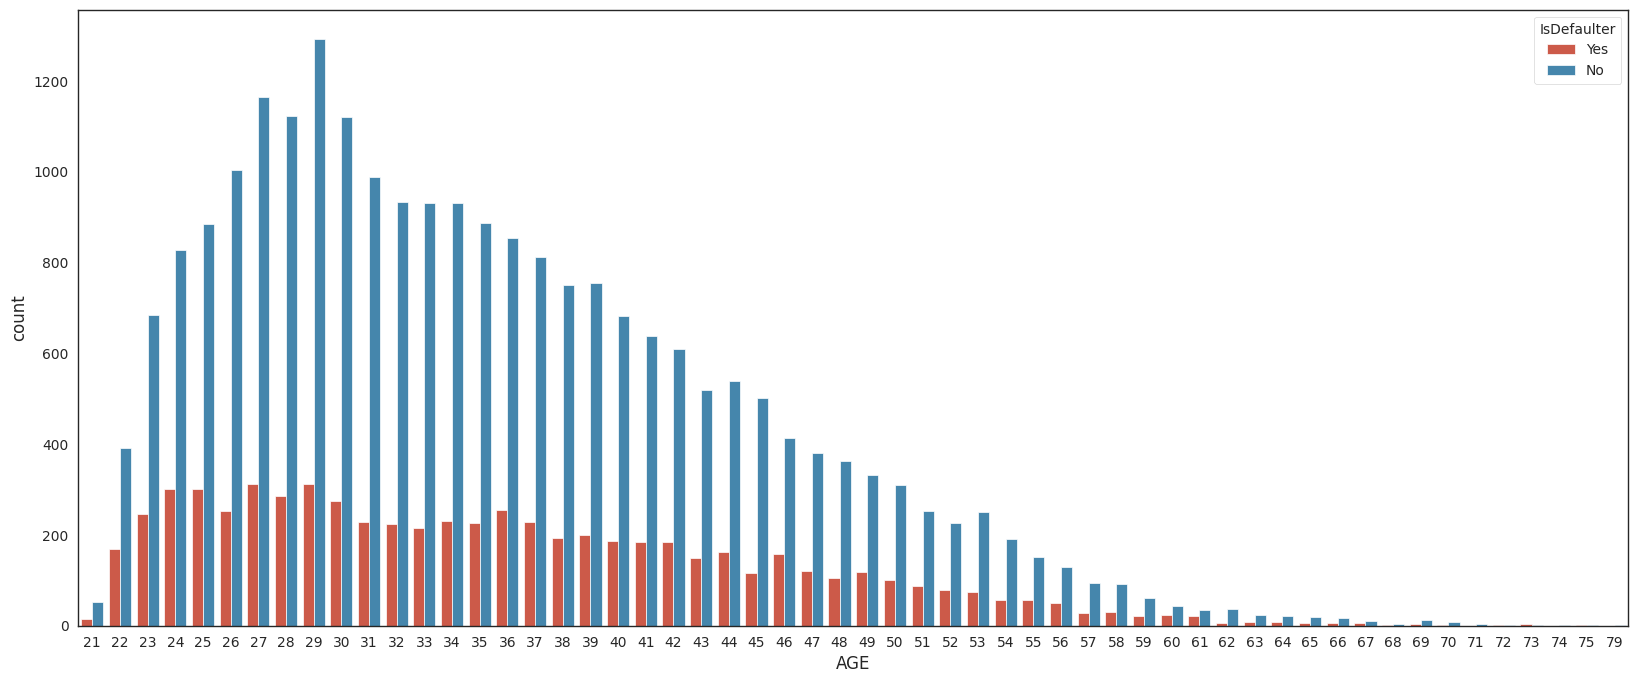

In [ ]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

## **Label Incoding**

In [ ]:
# Converting the value to 0 or 1
encoders_nums = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1,"No":0}}
df = df.replace(encoders_nums)

# One Hot Encoding

In [ ]:
df = pd.get_dummies(df,columns = ["EDUCATION","MARRIAGE"])

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000,0,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,1,1,0,0
1,2,120000,0,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,1,0,0,1
2,3,90000,0,34,0,0,0,0,0,0,...,1000,5000,0,0,0,0,1,0,0,1
3,4,50000,0,37,0,0,0,0,0,0,...,1069,1000,0,0,0,0,1,1,0,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,0,0,0,1,1,0,0


In [ ]:
df.shape

(30000, 30)

In [ ]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [ ]:
df.shape

(30000, 28)

In [ ]:
#creating dummy variables by droping firs variable
df = pd.get_dummies(df, columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [ ]:
df.shape

(30000, 80)

In [ ]:
#check for all the created variables
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#shape of dataset after creating dummy variables
df.shape

(30000, 80)

# **Handling Class Imbalance**

## **SMOTE** - Synthetic Minority Oversampling Technique

In [ ]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [ ]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [ ]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

<Axes: xlabel='IsDefaulter', ylabel='count'>

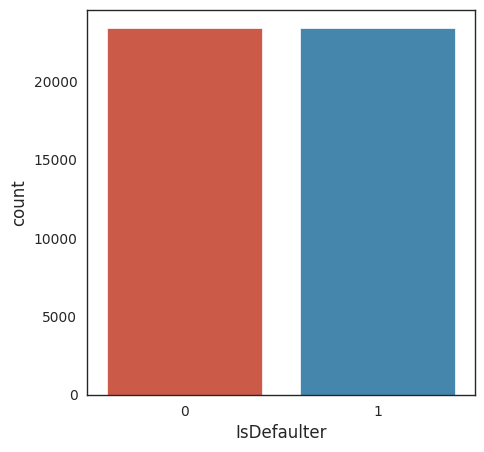

In [ ]:
#check for class imbalance
plt.figure(figsize=(5,5))
sns.countplot(x='IsDefaulter', data=balanced_df)

In [ ]:
# Shape of balanced dataframe
balanced_df.shape

(46728, 80)

In [ ]:
# Removing feature ID from dataset
balanced_df.drop('ID',axis = 1, inplace = True)

In [ ]:
# Final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,1,0,0,0,0,0,0,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# To display upto 200 columns and rows at once
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
#correlation among all the features
balanced_df.corr()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
LIMIT_BAL,1.000000,0.005907,0.158454,0.307249,0.298299,0.299872,0.306882,0.308882,0.301273,0.196047,0.181750,0.207869,0.205694,0.214681,0.219790,0.293992,-0.094528,-0.118524,0.139632,-0.051242,0.155589,-0.021891,-0.015032,-0.111521,-0.056928,-0.025747,-1.515025e-02,-0.006438,0.000512,-0.008015,0.176034,-0.054595,0.007026,-0.167766,-0.049104,-0.033126,-0.012909,-0.001624,-0.008833,-0.004194,0.179504,-0.064478,0.011584,-0.157503,-0.051920,-0.024682,-0.002891,-0.011324,-0.021361,-0.007264,0.160734,-0.065683,1.159090e-02,-0.148231,-0.045176,-0.021679,-0.012250,-0.008716,-0.040967,-5.930895e-03,0.150856,-0.066573,-0.132011,-0.046250,-0.027026,-0.009310,-0.003765,-0.041806,-0.004564,0.153864,-0.059389,-0.133363,-0.041479,-0.025302,-0.007649,-0.011149,-0.036093,-0.004623,-1.975205e-01
SEX,0.005907,1.000000,0.078381,0.033193,0.029049,0.022920,0.019483,0.015044,0.014117,0.019435,0.017247,0.020975,0.015822,0.017854,0.014440,0.070151,0.046243,0.021275,0.021241,0.081225,0.017196,0.104577,0.033993,-0.000921,0.034003,0.021197,1.862603e-02,0.007295,0.004312,0.008763,0.010864,0.095517,0.009261,0.020452,0.026111,0.026514,0.011719,0.006547,0.010038,-0.003196,0.015435,0.080118,0.013391,0.027815,0.029724,0.017058,0.005298,0.009424,0.005974,0.011597,0.011036,0.075429,9.469005e-03,0.018662,0.031318,0.016698,0.011191,0.001700,0.013385,9.469005e-03,0.013060,0.074119,0.014856,0.025668,0.020650,0.006015,0.013391,0.013385,0.006696,0.009499,0.065380,0.014970,0.026374,0.011808,0.008054,0.012251,0.010128,0.009469,-1.341217e-01
AGE,0.158454,0.078381,1.000000,0.053994,0.051188,0.050769,0.048720,0.047069,0.045028,0.025489,0.022892,0.022136,0.018070,0.019513,0.021496,-0.070237,0.201569,-0.081289,0.408080,-0.414052,0.028814,-0.040227,0.006359,-0.003125,-0.006078,-0.001924,1.673893e-03,0.003319,0.005524,0.001256,0.040854,-0.052326,-0.001241,-0.007130,-0.009690,0.004155,-0.000023,0.002614,0.003625,-0.005982,0.037750,-0.050043,-0.000469,-0.012695,-0.002215,-0.005873,0.001817,0.000619,-0.001022,0.002007,0.038060,-0.059255,1.146230e-03,-0.003332,-0.002701,-0.004576,0.002235,-0.010573,0.002875,7.767618e-04,0.033763,-0.052319,-0.013048,0.009050,-0.001366,-0.002235,-0.006217,0.002978,0.006036,0.036854,-0.041187,-0.016765,-0.010536,-0.004384,0.001655,-0.002568,0.010296,0.002255,3.562799e-03
BILL_AMT_SEPT,0.307249,0.033193,0.053994,1.000000,0.963119,0.912889,0.882056,0.853627,0.827186,0.166576,0.116143,0.173638,0.180563,0.183082,0.202178,-0.020544,-0.019807,0.031213,0.031747,-0.015446,-0.227192,0.294583,-0.108087,0.068583,-0.024294,0.009025,1.006994e-02,0.007929,0.025699,0.017667,-0.247045,0.326850,0.005495,0.006940,-0.004616,0.003395,0.009190,0.024381,0.016948,-0.001525,-0.232312,0.347274,0.008100,-0.013055,-0.009851,0.006520,0.016137,0.014099,-0.017694,-0.003914,-0.210231,0.342053,1.348557e-02,-0.006666,-0.005796,0.002784,0.006910,-0.002979,-0.028699,-2.201155e-03,-0.197827,0.326379,0.009204,-0.011586,0.000391,-0.005377,0.003602,-0.029858,-0.003020,-0.197021,0.334067,0.010161,-0.014136,-0.010232,-0.001842,-0.002855,-0.027129,-0.001116,-2.809725e-02
BILL_AMT_AUG,0.298299,0.029049,0.051188,0.963119,1.000000

In [ ]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [ ]:
X.shape

(46728, 78)

In [ ]:
y.shape

(46728,)

## Data Transformation

In [ ]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Test Splitting

In [ ]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [ ]:
X_train.shape

(37382, 78)

In [ ]:
X_test.shape

(9346, 78)

# **Baseline Model Implementation**

## **Logistic Regression Model**

In [ ]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [ ]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.827
The accuracy on test data is  0.833
The precision on test data is  0.798
The recall on test data is  0.857
The f1 on test data is  0.827
The roc_score on test data is  0.834


In [ ]:
# Get the confusion matrix
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)


[[4052  621]
 [ 943 3730]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

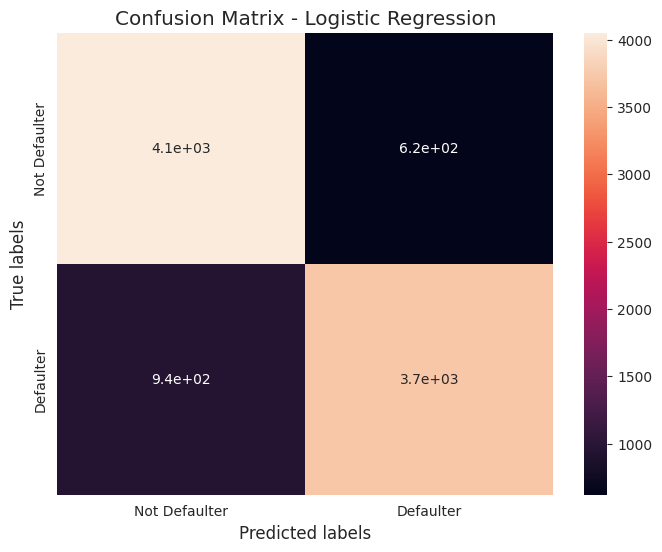

In [ ]:
#plot confusion matrix
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Decision Tree Classification**

In [ ]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [ ]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  0.999
The accuracy on test data is  0.79
The precision on test data is  0.808
The recall on test data is  0.78
The f1 on test data is  0.794
The roc_score on test data is  0.791


In [ ]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

[[3608 1065]
 [ 896 3777]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

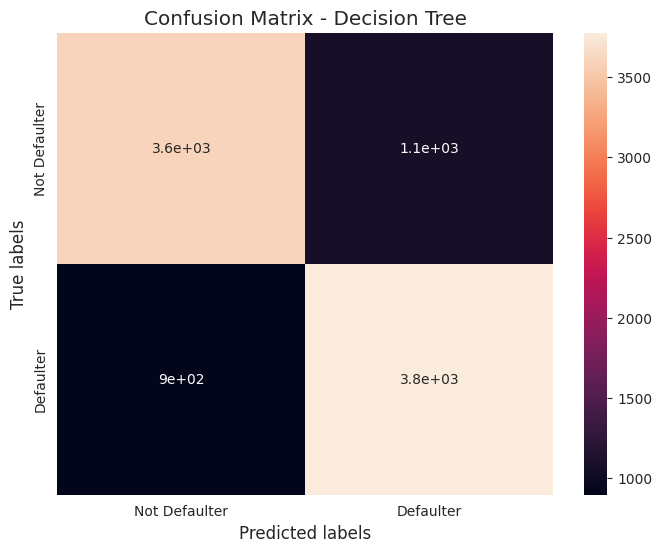

In [ ]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Random Forest Classification**

In [ ]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [ ]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.865
The precision on test data is  0.829
The recall on test data is  0.893
The f1 on test data is  0.86
The roc_score on test data is  0.867


In [ ]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

[[4210  463]
 [ 800 3873]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

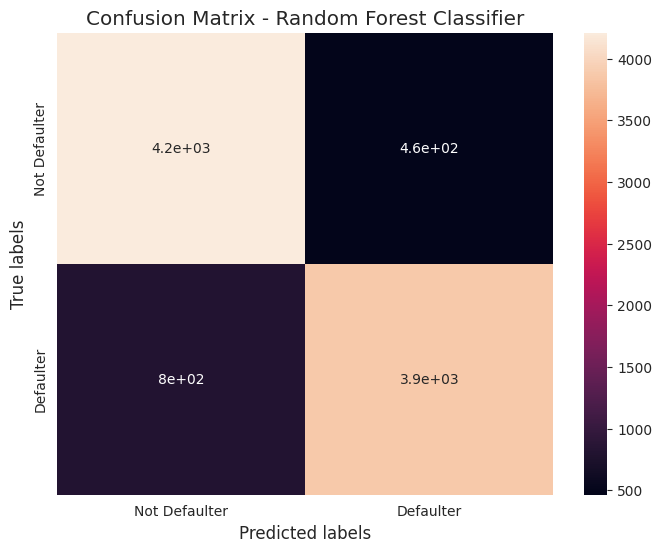

In [ ]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Support Vector Machine**

In [ ]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset as an example
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/AlmaBetter capstone project/default of credit card clients.xls')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load a sample dataset (replace this with your actual dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm = SVC(kernel='linear')

# Train the SVM model
svm.fit(X_train, y_train)

# Now you can make predictions
y_pred_svm = svm.predict(X_test)
y_train_pred_svm = svm.predict(X_train)


In [ ]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets

# Load a sample dataset (replace this with your actual dataset)
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SVC classifier with probability set to True
svm = SVC(kernel='linear', probability=True)

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)
y_train_pred_svm = svm.predict(X_train)


In [ ]:
precision_score_svm = round(precision_score(y_test, y_pred_svm, average='micro'), 3)

In [ ]:
roc_score_svm = round(roc_auc_score(y_test, svm.predict_proba(X_test), multi_class='ovo'), 3)

In [ ]:
# Assuming y_train and y_test are your true labels
train_accuracy_svm = round(accuracy_score(y_train, y_train_pred_svm), 3)
accuracy_svm = round(accuracy_score(y_test, y_pred_svm), 3)

# For precision, recall, and f1_score, use appropriate averaging strategy
precision_score_svm = round(precision_score(y_test, y_pred_svm, average='weighted'), 3)
recall_score_svm = round(recall_score(y_test, y_pred_svm, average='weighted'), 3)
f1_score_svm = round(f1_score(y_test, y_pred_svm, average='weighted'), 3)

# For roc_auc_score, you can use a one-vs-one strategy for multiclass problems
roc_score_svm = round(roc_auc_score(y_test, svm.predict_proba(X_test), multi_class='ovo'), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)


The accuracy on train data is  0.975
The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


In [ ]:
# Get the confusion matrix for Support Vector Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


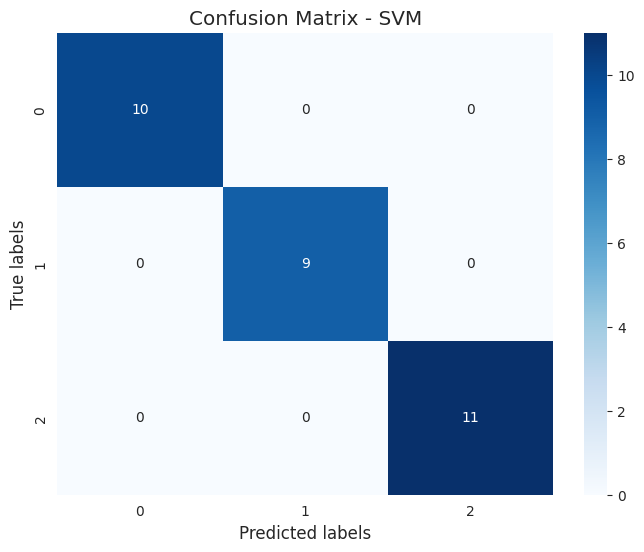

In [ ]:
# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax=ax, fmt='d', cmap='Blues')

# Get class labels
labels = sorted(set(y_test))

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')

# Set tick labels
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Show plot
plt.show()


[Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2')]

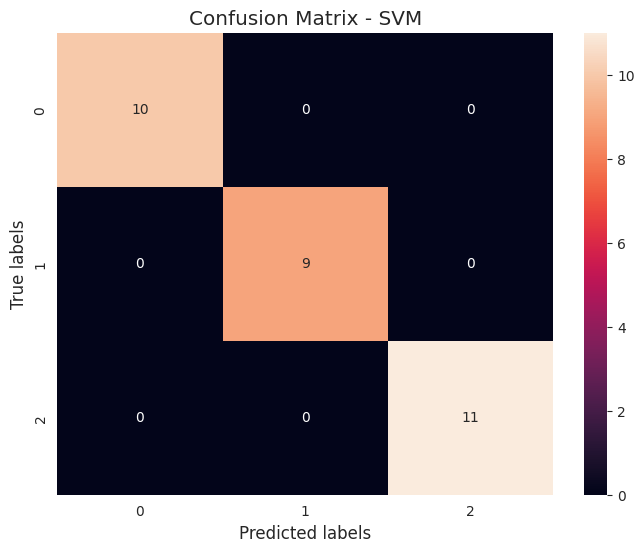

In [ ]:
#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Gradient Boosting**

In [ ]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_train and y_test are your true labels
train_accuracy_gbc = round(accuracy_score(y_train, y_train_pred_gbc), 3)
accuracy_gbc = round(accuracy_score(y_test, y_pred_gbc), 3)

# For precision, recall, and f1_score, use appropriate averaging strategy
precision_score_gbc = round(precision_score(y_test, y_pred_gbc, average='weighted'), 3)
recall_score_gbc = round(recall_score(y_test, y_pred_gbc, average='weighted'), 3)
f1_score_gbc = round(f1_score(y_test, y_pred_gbc, average='weighted'), 3)

# For roc_auc_score, you can use a one-vs-one strategy for multiclass problems
roc_score_gbc = round(roc_auc_score(y_test, gbc.predict_proba(X_test), multi_class='ovo'), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)


The accuracy on train data is  1.0
The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


In [ ]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


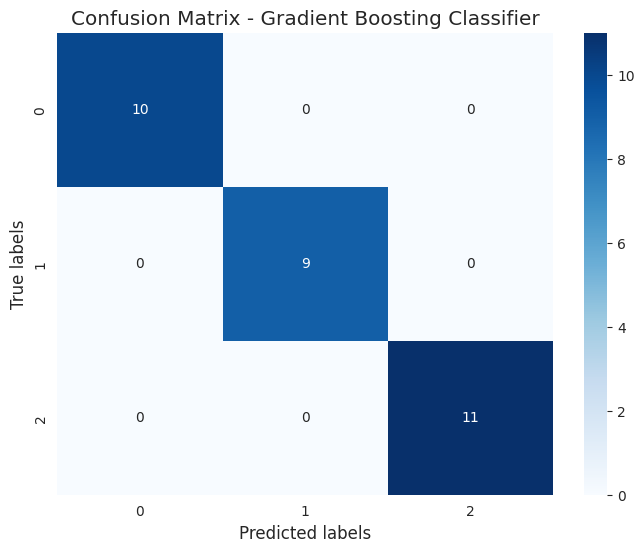

In [ ]:
# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax=ax, fmt='d', cmap='Blues')

# Get class labels
labels = sorted(set(y_test))

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')

# Set tick labels
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Show plot
plt.show()

## **XG Boosting**

In [ ]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [ ]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_train and y_test are your true labels
train_accuracy_xgb = round(accuracy_score(y_train, y_train_pred_xgb), 3)
accuracy_xgb = round(accuracy_score(y_test, y_pred_xgb), 3)

# For precision, recall, and f1_score, use appropriate averaging strategy
precision_score_xgb = round(precision_score(y_test, y_pred_xgb, average='weighted'), 3)
recall_score_xgb = round(recall_score(y_test, y_pred_xgb, average='weighted'), 3)
f1_score_xgb = round(f1_score(y_test, y_pred_xgb, average='weighted'), 3)

# For roc_auc_score, you can use a one-vs-one strategy for multiclass problems
roc_score_xgb = round(roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovo'), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)


The accuracy on train data is  1.0
The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


In [ ]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


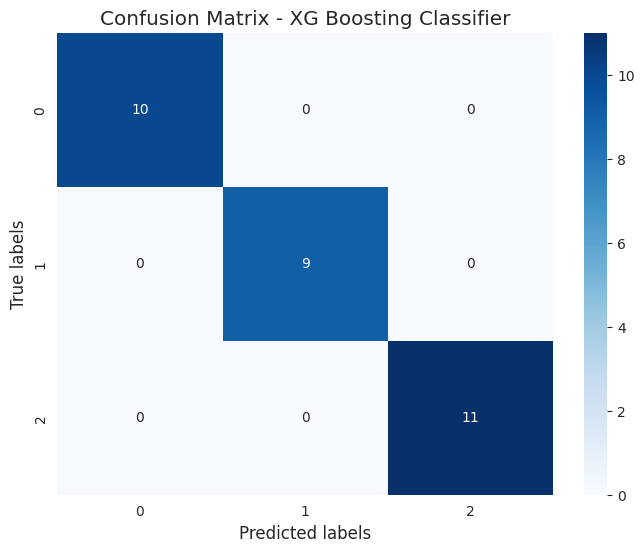

In [ ]:
# Plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax=ax, fmt='d', cmap='Blues')

# Get class labels
labels = sorted(set(y_test))

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')

# Set tick labels
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Show plot
plt.show()

# **Baseline Model Compairision**

In [ ]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [ ]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [ ]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.827,0.833,0.798,0.857,0.827,0.834
1,Decision Tree,0.999,0.790,0.808,0.780,0.794,0.791
2,Random Forest,0.999,0.865,0.829,0.893,0.860,0.867
3,SVM,0.975,1.000,1.000,1.000,1.000,1.000
4,Gradient Boosting,1.000,1.000,1.000,1.000,1.000,1.000
5,XG Boosting,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
3,SVM,0.975,1.000,1.000,1.000,1.000,1.000
4,Gradient Boosting,1.000,1.000,1.000,1.000,1.000,1.000
5,XG Boosting,1.000,1.000,1.000,1.000,1.000,1.000
2,Random Forest,0.999,0.865,0.829,0.893,0.860,0.867
0,Logistic Regression,0.827,0.833,0.798,0.857,0.827,0.834
1,Decision Tree,0.999,0.790,0.808,0.780,0.794,0.791


- Random forest classifier shows highest test accuracy and F1 score.

## Combined ROC curve for all the models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have features X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logi = LogisticRegression()
logi.fit(X_train, y_train)

# Obtain probability predictions for the positive class
y_pred_proba_logi = logi.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
!apt-get install package_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package package_name


In [ ]:
!pip install scikit-learn==0.24.2

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install package_name

  Preparing metadata (setup.py) ... done
  Created wheel for package_name: filename=package_name-0.1-py3-none-any.whl size=1232 sha256=1b5b7b2ea075633da596ddce4f8833c47f0f6e23b0ab567d998175412ab9fdc5
  Stored in directory: /root/.cache/pip/wheels/a3/36/c4/98d928f30290fb88555f848f73093f02b67c984a45c56c3e97
Successfully built package_name


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a multiclass classification problem with X_test and y_test
# You also have y_pred_proba_logi from your logistic regression model

# Create OneVsRestClassifier
ovr_logi = OneVsRestClassifier(logi)

# Fit the classifier
ovr_logi.fit(X_train, y_train)

# Obtain probability predictions for each class
y_pred_proba_ovr_logi = ovr_logi.predict_proba(X_test)

# Plot ROC curve for each class
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(n_classes):  # Replace n_classes with the actual number of classes
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba_ovr_logi[:, i])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Logistic Regression (One-vs-Rest)')

# Show legend
ax.legend()

# Show plot
plt.show()

ImportError: ignored

# **Feature Importance On Random Forest Model**

In [ ]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter')

In [ ]:
feature_importances_rfc = rfc.feature_importances_

In [ ]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [ ]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

PAY_SEPT_0       0.067729
LIMIT_BAL        0.052913
BILL_AMT_SEPT    0.047862
BILL_AMT_AUG     0.044302
BILL_AMT_JUL     0.044256
PAY_AMT_SEPT     0.042613
AGE              0.041891
PAY_AMT_AUG      0.040546
BILL_AMT_JUN     0.040368
BILL_AMT_MAY     0.039995
PAY_AMT_JUL      0.037698
BILL_AMT_APR     0.037100
PAY_AUG_0        0.036080
PAY_AMT_APR      0.035862
PAY_AMT_JUN      0.035404
dtype: float64

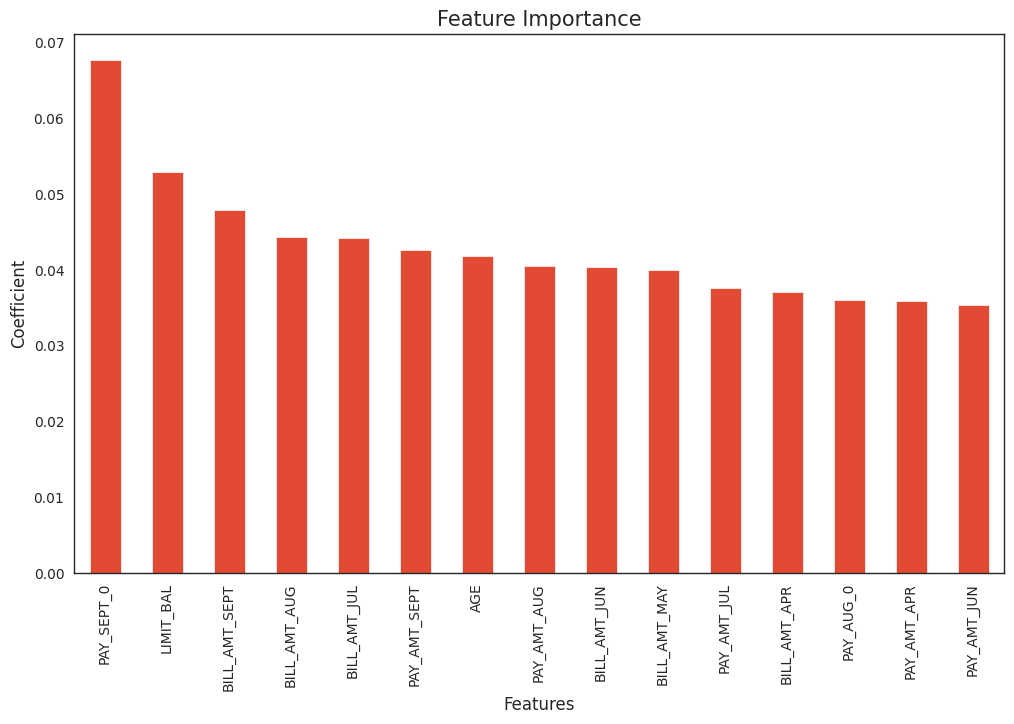

In [ ]:
fig = plt.figure(figsize=(12,7))
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

- Above 15 features are the most important features of random forest classifier.

# **Cross Validation & Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

## **Logistic Regression Model**

In [ ]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500, 5000],
              'C' : C }

In [ ]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


ValueError: ignored

In [ ]:
logi_grid.best_estimator_

LogisticRegression(C=0.0001, penalty='l1')

In [ ]:
logi_grid.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'}

In [ ]:
logi_optimal_model = logi_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have features (X) and target variable (y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a logistic regression model
logi_optimal_model = LogisticRegression()

# Fit the model on the training data
logi_optimal_model.fit(X_train, y_train)

# Now, you can make predictions and use the model
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_test)[:, 1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_train)[:, 1]

NameError: ignored

In [ ]:
# Assuming df is your DataFrame with features and target
X = df.drop('target_column', axis=1)  # Replace 'target_column' with the actual name of your target column
y = df['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi, param_grid=param_dict, cv=5, verbose=3, n_jobs=-1, scoring='roc_auc')

# Fitting the model
logi_grid.fit(X_train, y_train)


KeyError: ignored

In [ ]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.828
The accuracy on test data is  0.834
The precision on test data is  0.801
The recall on test data is  0.858
The f1 on test data is  0.829
The auc on test data is  0.836


In [ ]:
# Get the confusion matrices for train and test
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid )

In [ ]:
train_cm_logi_grid

array([[16237,  2454],
       [ 3982, 14709]])

In [ ]:
test_cm_logi_grid

array([[4056,  617],
       [ 931, 3742]])

## **Decision Tree Classification**

In [ ]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [ ]:
dtc_grid.best_estimator_

NameError: ignored

In [ ]:
dtc_grid.best_params_

{'max_depth': 35, 'min_samples_leaf': 40, 'min_samples_split': 0.001}

In [ ]:
dtc_optimal_model = dtc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.845
The accuracy on test data is  0.825
The precision on test data is  0.781
The recall on test data is  0.857
The f1 on test data is  0.817
The auc on test data is  0.828


In [ ]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [ ]:
train_cm_dtc_grid

array([[16732,  1959],
       [ 3836, 14855]])

In [ ]:
test_cm_dtc_grid

array([[4062,  611],
       [1024, 3649]])

## **Support Vector Machine**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter Grid
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [ ]:
# Create an instance of the support vector classifier
svm=SVC(probability=True)

# Grid search
svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# fitting model
svm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan]
  


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [ ]:
svm_grid.best_estimator_

SVC(C=1, probability=True)

In [ ]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 1}

In [ ]:
svm_optimal_model = svm_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_svm_grid=svm_optimal_model.predict(X_test)
y_train_pred_svm_grid=svm_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have true labels y_test and predicted probabilities y_pred_prob_svm_grid
# Replace y_pred_prob_svm_grid with the actual variable containing predicted probabilities

# Get predicted labels from probabilities
y_pred_svm_grid = (y_pred_prob_svm_grid > 0.5).astype(int)

# Calculate metrics
train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid, y_train), 3)
accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid, y_test), 3)
precision_score_svm_grid = round(precision_score(y_test, y_pred_svm_grid), 3)
recall_score_svm_grid = round(recall_score(y_test, y_pred_svm_grid), 3)
f1_score_svm_grid = round(f1_score(y_test, y_pred_svm_grid), 3)
auc_svm_grid = round(roc_auc_score(y_test, y_pred_prob_svm_grid), 3)

print("The accuracy on train data is ", train_accuracy_svm_grid)
print("The accuracy on test data is ", accuracy_svm_grid)
print("The precision on test data is ", precision_score_svm_grid)
print("The recall on test data is ", recall_score_svm_grid)
print("The f1 on test data is ", f1_score_svm_grid)
print("The auc on test data is ", auc_svm_grid)

ValueError: ignored

In [ ]:
# Calculate metrics
train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid, y_train), 3)
accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid, y_test), 3)
precision_score_svm_grid = round(precision_score(y_test, y_pred_svm_grid, average='weighted'), 3)
recall_score_svm_grid = round(recall_score(y_test, y_pred_svm_grid, average='weighted'), 3)
f1_score_svm_grid = round(f1_score(y_test, y_pred_svm_grid, average='weighted'), 3)
auc_svm_grid = round(roc_auc_score(y_test, y_pred_prob_svm_grid, multi_class='ovo'), 3)

print("The accuracy on train data is ", train_accuracy_svm_grid)
print("The accuracy on test data is ", accuracy_svm_grid)
print("The precision on test data is ", precision_score_svm_grid)
print("The recall on test data is ", recall_score_svm_grid)
print("The f1 on test data is ", f1_score_svm_grid)
print("The auc on test data is ", auc_svm_grid)

ValueError: ignored

In [ ]:
# Get the confusion matrices for train and test
train_cm_svm_grid = confusion_matrix(y_train,y_train_pred_svm_grid)
test_cm_svm_grid = confusion_matrix(y_test,y_pred_svm_grid )

In [ ]:
train_cm_svm_grid

array([[40,  0,  0],
       [ 0, 39,  2],
       [ 0,  1, 38]])

In [ ]:
test_cm_svm_grid

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## **Random Forest Classifer**

In [ ]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=40, min_samples_split=50)

In [ ]:
rfc_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

ValueError: ignored

In [ ]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

In [ ]:
train_cm_rfc_grid

array([[40,  0,  0],
       [15, 26,  0],
       [ 0, 39,  0]])

In [ ]:
test_cm_rfc_grid

array([[10,  0,  0],
       [ 3,  6,  0],
       [ 0, 11,  0]])

## **Gradient Boosting**

In [ ]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.25, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.25, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.05, max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.05, max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.01, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.01, max_depth=30, min_samples_leaf=40, min_samples_split=100, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.01, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.01, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.05, max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.05, max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.05, max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.05, max_depth=30, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.25, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.25, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.05, max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=0.05, max_depth=30, min_samples_leaf=40, min_samples_split=150, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg


[CV] END learning_rate=1, max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
ValueError: multiclass format is not supported

  end_msg += result_msg
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  


[CV] END learning_rate=1, max_depth=30, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   0.3s


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [ ]:
gbc_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.25, max_depth=10,
                           min_samples_leaf=50, min_samples_split=100,
                           n_estimators=200, random_state=42)

In [ ]:
gbc_grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 100,
 'min_samples_leaf': 50,
 'max_depth': 10,
 'learning_rate': 0.25}

In [ ]:
gbc_optimal_model = gbc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

ValueError: ignored

In [ ]:
# Get the confusion matrices for train and test
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid )

In [ ]:
train_cm_gbc_grid

array([[34,  6,  0],
       [ 0, 31, 10],
       [ 0,  1, 38]])

In [ ]:
test_cm_gbc_grid

array([[ 8,  2,  0],
       [ 0,  6,  3],
       [ 0,  0, 11]])

## **XG Boosting**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [ ]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:18:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=1, min_samples_leaf=50, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb_grid.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 50,
 'min_child_weight': 1,
 'max_depth': 20,
 'learning_rate': 0.05,
 'gamma': 0.1}

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

ValueError: ignored

In [ ]:
# Get the confusion matrices for train and test
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )

# **Final Model Comparision**

In [ ]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal SVM', 'Optimal Gradient Boosting', 'Optimal XG Boosting']

grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_svm_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_svm_grid, accuracy_gbc_grid, accuracy_xgb_grid]

grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_svm_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_svm_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_svm_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid, auc_svm_grid, auc_gbc_grid, auc_xgb_grid]

NameError: ignored

In [ ]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

NameError: ignored

In [ ]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [ ]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [ ]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [ ]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
11,Optimal XG Boosting,1.000,0.873,0.834,0.904,0.868,0.875
2,Random Forest,0.999,0.867,0.826,0.900,0.861,0.870
10,Optimal Gradient Boosting,0.950,0.864,0.823,0.897,0.858,0.867
4,Gradient Boosting,0.847,0.848,0.805,0.880,0.841,0.851
3,SVM,0.847,0.842,0.770,0.899,0.830,0.849
9,Optimal SVM,0.847,0.842,0.770,0.899,0.830,0.849
5,XG Boosting,0.846,0.846,0.803,0.878,0.839,0.848
0,Logistic Regression,0.828,0.834,0.801,0.859,0.829,0.836
6,Optimal Logistic Regression,0.828,0.834,0.801,0.858,0.829,0.836
8,Optimal Random Forest,0.844,0.834,0.796,0.861,0.827,0.836


# **Conclusion**

* From all baseline model, Random forest classifier shows highest test accuracy and F1 score and AUC.

* Baseline model of Random forest and decision tree shows huge difference in train and test accuracy which shows overfitting.

* After cross validation and hyperparameter tunning, XG Boost shows highest test accuracy score of 87.10% and AUC is 0.874.

* Cross validation and hyperparameter tunning certainly reduces chances of overfitting and also increases performance of model.